In [1]:
require(ggplot2)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [21]:
m=rep(240,4)
y=c(107,31,156,84)
p=y/m
A=factor(c("A1","A1","A2","A2"))
B=factor(c("B1","B2","B1","B2"))

In [22]:
y

[1] 107  31 156  84

In [23]:
p

[1] 0.4458333 0.1291667 0.6500000 0.3500000

In [5]:
A

[1] A1 A1 A2 A2
Levels: A1 A2

In [6]:
B

[1] B1 B2 B1 B2
Levels: B1 B2

In [7]:
dados=data.frame(m,y,p,A,B)
dados

m,y,p,A,B
<dbl>,<dbl>,<dbl>,<fct>,<fct>
240,107,0.45,A1,B1
240,31,0.13,A1,B2
240,156,0.65,A2,B1
240,84,0.35,A2,B2


In [8]:
resp=cbind(y,m-y)
resp

y,
107,133
31,209
156,84
84,156


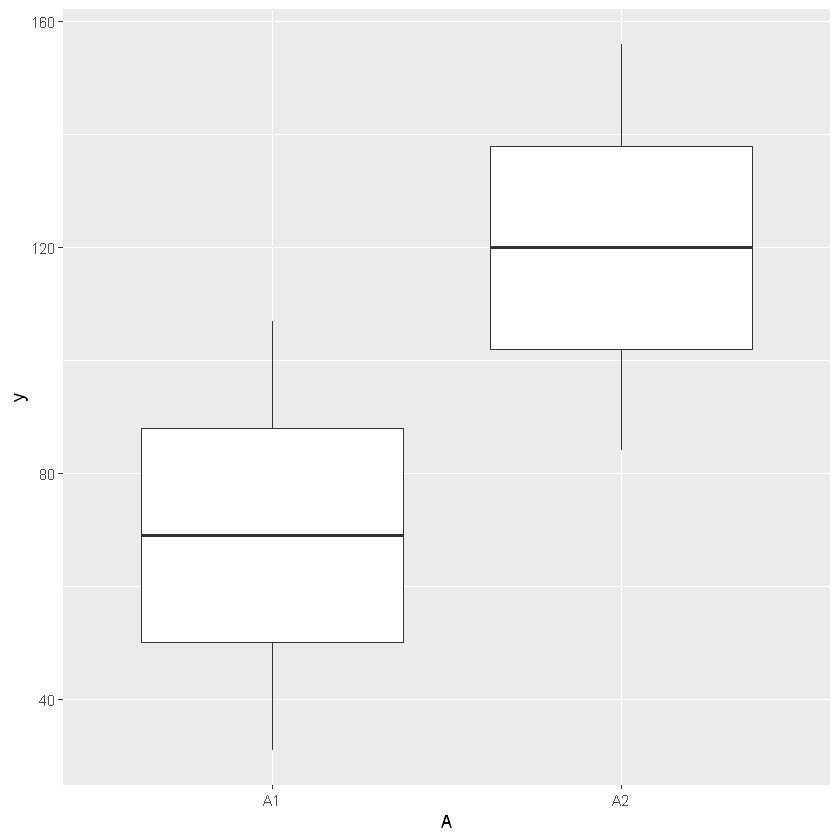

In [9]:
#Análise exploratória
ggplot(dados)+aes(A,y)+geom_boxplot()

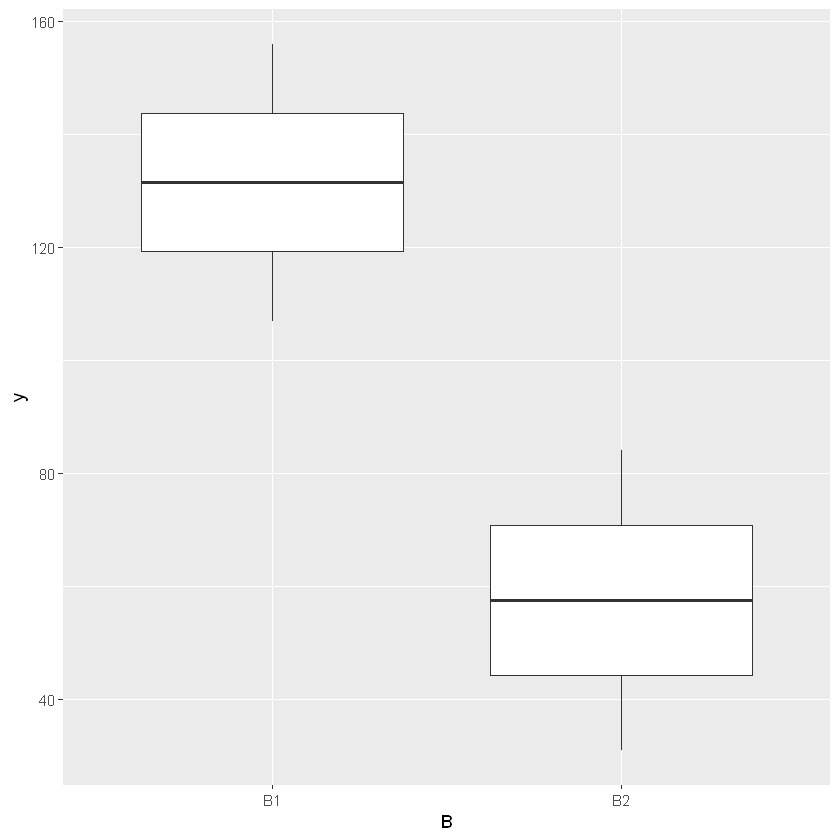

In [10]:
ggplot(dados)+aes(B,y)+geom_boxplot()

In [11]:
#Modelo só com o intercepto
modelo=glm(resp~1,family=binomial(link="logit"))
summary(modelo)


Call:
glm(formula = resp ~ 1, family = binomial(link = "logit"))

Deviance Residuals: 
     1       2       3       4  
 1.640  -9.071   8.006  -1.397  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.43158    0.06606  -6.533 6.44e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.02  on 3  degrees of freedom
Residual deviance: 151.02  on 3  degrees of freedom
AIC: 175.76

Number of Fisher Scoring iterations: 4


In [12]:
#Modelo só com o fator A
modelo1=glm(resp~A,family=binomial(link="logit"))
summary(modelo1)


Call:
glm(formula = resp ~ A, family = binomial(link = "logit"))

Deviance Residuals: 
     1       2       3       4  
 5.200  -5.854   4.684  -4.684  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9076     0.1008  -8.999  < 2e-16 ***
AA2           0.9076     0.1360   6.672 2.53e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.02  on 3  degrees of freedom
Residual deviance: 105.18  on 2  degrees of freedom
AIC: 131.92

Number of Fisher Scoring iterations: 4


In [13]:
anova(modelo1,test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,3,151.0193,NA
A,1,45.8369,2,105.1824,1.285196e-11


In [14]:
#Modelo só com fator b
modelo2=glm(resp~B,family=binomial(link="logit"))
summary(modelo2)


Call:
glm(formula = resp ~ B, family = binomial(link = "logit"))

Deviance Residuals: 
     1       2       3       4  
-3.168  -4.286   3.211   3.837  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.19226    0.09171   2.096    0.036 *  
BB2         -1.34722    0.14088  -9.563   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.02  on 3  degrees of freedom
Residual deviance:  53.44  on 2  degrees of freedom
AIC: 80.183

Number of Fisher Scoring iterations: 4


In [15]:
anova(modelo2,test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,3,151.01932,NA
B,1,97.5789,2,53.44041,5.175238e-23


In [16]:
#Modelo com A e B
modelo3=glm(resp~A+B,family=binomial(link="logit"))
summary(modelo3)


Call:
glm(formula = resp ~ A + B, family = binomial(link = "logit"))

Deviance Residuals: 
      1        2        3        4  
 0.6642  -0.9393  -0.6966   0.6966  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3039     0.1172  -2.594  0.00949 ** 
AA2           1.0177     0.1455   6.995 2.64e-12 ***
BB2          -1.4275     0.1465  -9.747  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 151.0193  on 3  degrees of freedom
Residual deviance:   2.2938  on 1  degrees of freedom
AIC: 31.036

Number of Fisher Scoring iterations: 3


In [17]:
anova(modelo3,test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,3,151.019316,NA
A,1,45.8369,2,105.182415,1.285196e-11
B,1,102.8886,1,2.293839,3.545383e-24


In [18]:
#Modelo com A e B e a interação
modelo4=glm(resp~A*B,family=binomial(link="logit"))
summary(modelo4)


Call:
glm(formula = resp ~ A * B, family = binomial(link = "logit"))

Deviance Residuals: 
[1]  0  0  0  0

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.2175     0.1299  -1.675   0.0939 .  
AA2           0.8366     0.1876   4.460 8.19e-06 ***
BB2          -1.6908     0.2322  -7.282 3.28e-13 ***
AA2:BB2       0.4527     0.3009   1.505   0.1324    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.5102e+02  on 3  degrees of freedom
Residual deviance: 6.3949e-14  on 0  degrees of freedom
AIC: 30.742

Number of Fisher Scoring iterations: 3


In [19]:
anova(modelo4,test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,3,1.510193e+02,NA
A,1,45.836901,2,1.051824e+02,1.285196e-11
B,1,102.888575,1,2.293839e+00,3.545383e-24
A:B,1,2.293839,0,6.394885e-14,1.298883e-01
